In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
import scipy.stats as stat
from warnings import filterwarnings
from PIL import Image

In [3]:
Team = pd.read_excel('Team name.xlsx')

In [4]:
player = pd.read_csv('player_data.csv')

In [5]:
player.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [6]:
players = pd.read_csv('Players.csv')
players = pd.DataFrame(players)
players = players.drop('Unnamed: 0',axis=1)

In [7]:
seasons = pd.read_csv('Seasons_Stats.csv')
seasons = pd.DataFrame(seasons)
seasons = seasons.drop('Unnamed: 0',axis=1)

In [8]:
#Remove rows without player name
seasons=seasons[seasons['Player'] !=0]

In [9]:
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [10]:
seasons.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [11]:
df = pd.read_csv('all_seasons.csv')
df = pd.DataFrame(df)
df = df.drop('Unnamed: 0',axis=1)

In [12]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [13]:
#Combine two datasets to use both height(cm) and weight(kg), and career(year_start, year_end)
player_merge = pd.merge(players, player, left_on='Player', right_on='name')

In [14]:
player_merge = player_merge.drop(['birth_city','birth_state','birth_date','college','collage'],axis=1)

In [15]:
player_merge.head()

,Player,height_x,weight_x,born,name,year_start,year_end,position,height_y,weight_y
0,Curly Armstrong,180.0,77.0,1918.0,Curly Armstrong,1949,1951,G-F,5-11,170.0
1,Cliff Barker,188.0,83.0,1921.0,Cliff Barker,1950,1952,G,6-2,185.0
2,Leo Barnhorst,193.0,86.0,1924.0,Leo Barnhorst,1950,1954,F-G,6-4,190.0
3,Ed Bartels,196.0,88.0,1925.0,Ed Bartels,1950,1951,F,6-5,195.0
4,Ralph Beard,178.0,79.0,1927.0,Ralph Beard,1950,1951,G,5-10,175.0


##### Body profile focused on height and weight

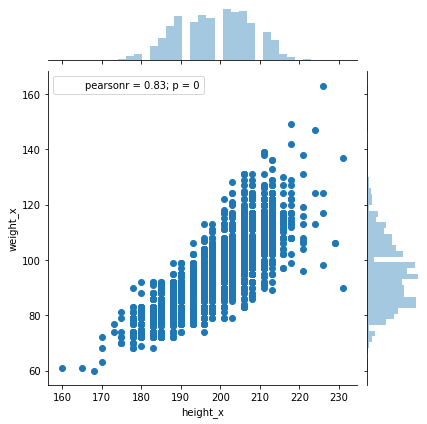

In [16]:
#Joint plot of height and weight of players 
filterwarnings('ignore')
sns.jointplot(x='height_x',y='weight_x',data=player_merge,kind='scatter',stat_func=stat.pearsonr)

> As expected, high correlation exists between height and weight of players.

In [17]:
#Create a new column of 'year_start_d' describing which decades each player played.
conditions = [
    (player_merge['year_start'] <1980),
    (player_merge['year_start'] >= 1980) & (player_merge['year_start'] < 2000),
    (player_merge['year_start'] >= 2000)
]
values = ['~1980','1980~2000','2000~']
player_merge['year_start_d'] = np.select(conditions,values)

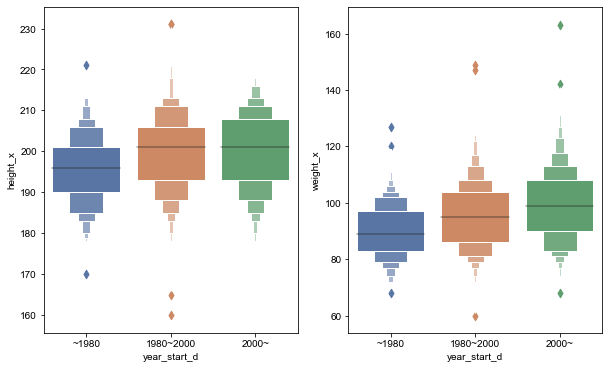

In [18]:
#How body profile (height,weight) changed over time
fig,ax=plt.subplots(1,2,figsize=(10,6))
sns.set(style='whitegrid')
sns.boxenplot(x = 'year_start_d', y='height_x',data=player_merge,ax=ax[0])
sns.boxenplot(x = 'year_start_d', y='weight_x',data=player_merge,ax=ax[1])

> Height and weight of players changed over time. Players got taller especially when comparing players' heights before 1980 and after 1980. Players got heavier and the median weight values significantly increased. 

In [19]:
#Earl Boykins is the second shortest player in the NBA history.
player_merge[(player_merge['year_start'] >= 1990) &
            (player_merge['height_x']>230)]
player_merge[(player_merge['year_start'] >= 1990) &
            (player_merge['height_x']<170)]

,Player,height_x,weight_x,born,name,year_start,year_end,position,height_y,weight_y,year_start_d
2480,Earl Boykins,165.0,61.0,1976.0,Earl Boykins,1999,2012,G,5-5,135.0,1980~2000


##### MVP (1987~)
There are three primary components that come into play when determining the most worthy recipient of MVP: team success, individual statistics, and media narratives.

In [20]:
MVP = pd.read_csv('MVPs.csv')
MVP = MVP.drop('Unnamed: 0',axis=1)
MVP = MVP.sort_values('YEAR')
MVP.reset_index(drop=True,inplace=True)

In [21]:
seasons.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

##### Performance measures of MVPs

In [22]:
#Create performance measures per game
seasons['PPG'] = round(seasons['PTS']/seasons['G'],1)
seasons['APG'] = round(seasons['AST']/seasons['G'],1)
seasons['RPG'] = round(seasons['TRB']/seasons['G'],1)
seasons['BLKPG'] = round(seasons['BLK']/seasons['G'],1)

In [23]:
#Create dataset, drop na value-contained rows, subset data (year>=1987), removed unnecessary characters
seasons_perf = seasons[['Year','Player','Pos','Tm','Age',"FG%",'PPG','APG','RPG','BLKPG','PER','TS%','3PAr','FTr','3P%','2P%']]
seasons_perf = seasons_perf.dropna()
seasons_perf = seasons_perf[seasons_perf['Year']>=1987]
seasons_perf = seasons_perf.reset_index(drop=True)
seasons_perf['Player'] = seasons_perf['Player'].str.replace('*','')

In [20]:
seasons_perf.head()

,Year,Player,Pos,Age,FG%,PPG,APG,RPG,BLKPG,PER,TS%,3PAr,FTr,3P%,2P%
0,1987.0,Kareem Abdul-Jabbar,C,39.0,0.564,17.5,2.6,6.7,1.2,17.9,0.597,0.003,0.345,0.333,0.565
1,1987.0,Alvan Adams,C,32.0,0.503,11.1,3.3,5.0,0.5,14.6,0.546,0.002,0.275,0.000,0.504
2,1987.0,Michael Adams,PG,24.0,0.407,7.2,3.9,2.0,0.1,14.3,0.506,0.260,0.316,0.275,0.454
3,1987.0,Rafael Addison,SF,22.0,0.441,5.8,0.7,1.7,0.1,11.9,0.500,0.151,0.193,0.320,0.463
4,1987.0,Mark Aguirre,SF,27.0,0.495,25.7,3.2,5.3,0.4,22.1,0.560,0.094,0.350,0.353,0.510


In [101]:
#Cross check of performance measures of two datasets using 
KM = seasons_perf[(seasons_perf['Player']=='Karl Malone')&(seasons_perf['Year'] == 1997.0)]
MJ = seasons_perf[(seasons_perf['Player']=='Michael Jordan')&(seasons_perf['Year'] == 1997.0)]
KMJ = KM.append(MJ)

In [107]:
KMJ2 = KMJ[['Player','FG%','PPG','APG','RPG','BLKPG','3P%','2P%']]

In [217]:
KMJ2

,Player,FG%,PPG,APG,RPG,BLKPG,3P%,2P%
3912,Karl Malone,0.550,27.4,4.5,9.9,0.6,0.000,0.555
3882,Michael Jordan,0.486,29.6,4.3,5.9,0.5,0.374,0.507


In [27]:
#Match the column names of MVP data before merging 
MVP = MVP.rename(columns={'YEAR':'Year','PLAYER':'Player'})

In [90]:
MVP[MVP['Player']=='Michael Jordan']

,Year,Player,POS,TEAM,FG%,PPG,RPG,APG,BLKPG,MVP
1,1988,Michael Jordan,G,Chicago Bulls,0.535,35.0,5.5,5.9,1.6,1
4,1991,Michael Jordan,G,Chicago Bulls,0.539,31.5,6.0,5.5,1.0,1
5,1992,Michael Jordan,G,Chicago Bulls,0.519,30.1,6.4,6.1,0.9,1
9,1996,Michael Jordan,G,Chicago Bulls,0.495,30.4,6.6,4.3,0.5,1
11,1998,Michael Jordan,G,Chicago Bulls,0.465,28.7,5.8,3.5,0.5,1


In [29]:
MVP['MVP'] = 1

In [30]:
#Combine two data, create MVP column indicating 1 for MVP, 0 for non-MVP players per season
MVP_season = pd.merge(MVP,seasons_perf,on=['Year','Player'],how='right')
MVP_season['MVP'] =MVP_season['MVP'].fillna(0)

In [31]:
MVP_season = MVP_season.drop(['POS', 'TEAM', 'FG%_x', 'PPG_x', 'RPG_x', 'APG_x',
       'BLKPG_x'],axis=1)
MVP_season.columns

Index(['Year', 'Player', 'MVP', 'Pos', 'Tm', 'Age', 'FG%_y', 'PPG_y', 'APG_y',
       'RPG_y', 'BLKPG_y', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%'],
      dtype='object')

##### MVP data of all seasons from 1956

In [32]:
MVP2 = pd.read_excel('MVPlist.xlsx')

#https://www.basketball-reference.com/awards/mvp.html#all_mvp_NBA

In [33]:
MVP2['MVP']=1

In [34]:
MVP2

,Year,MVP name,MVP
0,1956,Bob Pettit,1
1,1957,Bob Cousy,1
2,1958,Bill Russell,1
3,1959,Bob Pettit,1
4,1960,Wilt Chamberlain,1
...,...,...,...
57,2013,LeBron James,1
58,2014,Kevin Durant,1
59,2015,Stephen Curry,1
60,2016,Stephen Curry,1


In [35]:
#Combine two data, create MVP column indicating 1 for MVP, 0 no-MVP of each year
MVP_season2 = seasons_perf.merge(MVP2,on='Year',how='left')
MVP_season2['MVP'] = np.where((MVP_season2['MVP name'] == MVP_season2['Player']),1,0)

In [36]:
MVP_season2

,Year,Player,Pos,Tm,Age,FG%,PPG,APG,RPG,BLKPG,PER,TS%,3PAr,FTr,3P%,2P%,MVP name,MVP
0,1987.0,Kareem Abdul-Jabbar,C,LAL,39.0,0.564,17.5,2.6,6.7,1.2,17.9,0.597,0.003,0.345,0.333,0.565,Magic Johnson,0
1,1987.0,Alvan Adams,C,PHO,32.0,0.503,11.1,3.3,5.0,0.5,14.6,0.546,0.002,0.275,0.000,0.504,Magic Johnson,0
2,1987.0,Michael Adams,PG,WSB,24.0,0.407,7.2,3.9,2.0,0.1,14.3,0.506,0.260,0.316,0.275,0.454,Magic Johnson,0
3,1987.0,Rafael Addison,SF,PHO,22.0,0.441,5.8,0.7,1.7,0.1,11.9,0.500,0.151,0.193,0.320,0.463,Magic Johnson,0
4,1987.0,Mark Aguirre,SF,DAL,27.0,0.495,25.7,3.2,5.3,0.4,22.1,0.560,0.094,0.350,0.353,0.510,Magic Johnson,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13392,2017.0,Thaddeus Young,PF,IND,28.0,0.527,11.0,1.6,6.1,0.4,14.9,0.562,0.172,0.125,0.381,0.557,Russell Westbrook,0
13393,2017.0,Cody Zeller,PF,CHO,24.0,0.571,10.3,1.6,6.5,0.9,16.7,0.604,0.002,0.442,0.000,0.572,Russell Westbrook,0
13394,2017.0,Tyler Zeller,C,BOS,27.0,0.494,3.5,0.8,2.4,0.4,13.0,0.508,0.006,0.247,0.000,0.497,Russell Westbrook,0
13395,2017.0,Paul Zipser,SF,CHI,22.0,0.398,5.5,0.8,2.8,0.4,6.9,0.503,0.448,0.181,0.333,0.451,Russell Westbrook,0


In [37]:
MVP_season2.columns

Index(['Year', 'Player', 'Pos', 'Tm', 'Age', 'FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%', 'MVP name', 'MVP'],
      dtype='object')

### NBA championship

In [38]:
#https://data.world/datatouille/nba-finals-and-mvps
Championship = pd.read_excel('NBA Finals.xlsx')
Championship = Championship.dropna()

In [39]:
#Create a column 'WinTeam' indicating if the MVP comes from either champion or vice-champion (1). (0) otherwise.
Championship['WinTeam'] = np.where((Championship['MVP status'] == 'Champion') 
                                       | (Championship['MVP status'] == 'Vice-Champion'),1,0)

Let's combine datasets (player statistics data per season, MVP per season, and NBA championship per season). 

In [40]:
MVP_Champ = MVP_season2.merge(Championship, on='Year',how='left')
MVP_Champ = MVP_Champ.merge(Team, on='MVP Team', how='left')

In [41]:
MVP_Champ.columns

Index(['Year', 'Player', 'Pos', 'Tm', 'Age', 'FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%', 'MVP name', 'MVP',
       'NBA Champion', 'NBA Vice-Champion', 'MVP Team', 'MVP status',
       'WinTeam', 'Acronym'],
      dtype='object')

In [42]:
#WinTeam columns indicates if the player is in the champion team in that season.
MVP_Champ['WinTeam'] = np.where((MVP_Champ['Tm'] == MVP_Champ['Acronym']),1,0)

In [223]:
#How many times the MVP was awarded to a player in the champion team
MVP_Champ[(MVP_Champ['MVP']==1)].groupby('WinTeam')['MVP'].count()

WinTeam
0     3
1    28
Name: MVP, dtype: int64

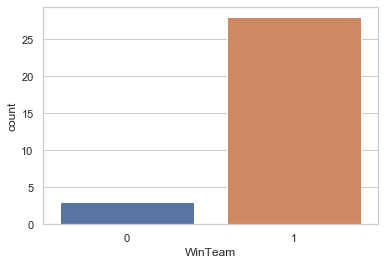

In [227]:
plot = sns.countplot(x='WinTeam',data=MVP_Champ[(MVP_Champ['MVP']==1)])
fig = plot.get_figure()
fig.savefig('countplot.png') 


### Multicollinearity

VIF will show the correlation of a variable with a group of other variables.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def calc_vif(X):
    
    vif = pd.DataFrame()
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return(vif)

In [80]:
X = MVP_Champ[['FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%']]
calc_vif(X)

,Variables,VIF
0,FG%,908.618807
1,PPG,11.922612
2,APG,3.837924
3,RPG,9.746144
4,BLKPG,3.475680
5,PER,27.770275
6,TS%,769.005341
7,3PAr,12.248703
8,FTr,8.562962
9,3P%,5.535709


In [126]:
seasons.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PPG', 'APG', 'RPG', 'BLKPG'],
      dtype='object')

In [135]:
seasons_vif = seasons.drop(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP','blank2','blanl'],axis=1).dropna()

In [142]:
s_vif = calc_vif(seasons_vif)
s_vif.sort_values(by=['VIF'],inplace=True)
s_vif

,Variables,VIF
25,3P%,5.378904
19,VORP,18.133070
9,BLK%,19.946959
8,STL%,24.215588
3,FTr,26.002280
37,STL,28.518881
40,PF,30.396558
38,BLK,41.016037
10,TOV%,41.281564
7,AST%,47.491188


#### Standardize the Variables

In [183]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [188]:
MVP_scaled_stats = MVP_Champ[['FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%','WinTeam']]
scaler.fit(MVP_scaled_stats)
scaled_features = scaler.transform(MVP_scaled_stats)
df_feat = pd.DataFrame(scaled_features,columns=['FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%','WinTeam'])

##### Logistic regression

In [109]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [149]:
X = MVP_Champ[['FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%','WinTeam']]
y = MVP_Champ['MVP']

In [112]:
#Variable selection - Lasso logistic regression
sel_=SelectFromModel(LogisticRegression(penalty='l1'))
sel_.fit(X_train,y_train)
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 12
selected features: 5
features with coefficients shrank to zero: 7


In [113]:
selected_feat

Index(['PPG', 'APG', 'RPG', 'PER', 'WinTeam'], dtype='object')

In [214]:
X_train_selected = MVP_Champ[selected_feat]
X_train, X_test, y_train, y_test = train_test_split(X_train_selected, y, test_size=0.30, random_state=2)

In [216]:
#Training and predicting

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
roc_auc_score(y_test, predictions)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       1.00      0.25      0.40         8

    accuracy                           1.00      4020
   macro avg       1.00      0.62      0.70      4020
weighted avg       1.00      1.00      1.00      4020

[[4012    0]
 [   6    2]]


0.625

In [215]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.063589
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: -2.699   
Dependent Variable: MVP              AIC:              1202.5406
Date:               2020-07-27 00:48 BIC:              1238.2707
No. Observations:   9377             Log-Likelihood:   -596.27  
Df Model:           4                LL-Null:          -161.21  
Df Residuals:       9372             LLR p-value:      1.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     10.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
PPG          0.2743    0.0434    6.3130  0.0000   0.1891   0.3594
APG         -0.6352    0.1267   -5.0128  0.0000  -0.8836  -0.3868
RPG    

##### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier


In [231]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.30, random_state=2)

In [232]:
T = range(1,20)
accuracy = []

for t in T:
    rfc = RandomForestClassifier(n_estimators=t,random_state=2)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    accuracy.append(roc_auc_score(y_test, rfc_pred))
print(max(accuracy))

0.8125


In [233]:
accuracy.index(max(accuracy))

6

In [242]:
rfc = RandomForestClassifier(n_estimators=6,random_state=10)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
roc_auc_score(y_test,rfc_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       0.83      0.62      0.71         8

    accuracy                           1.00      4020
   macro avg       0.92      0.81      0.86      4020
weighted avg       1.00      1.00      1.00      4020

[[4011    1]
 [   3    5]]


0.8123753738783649

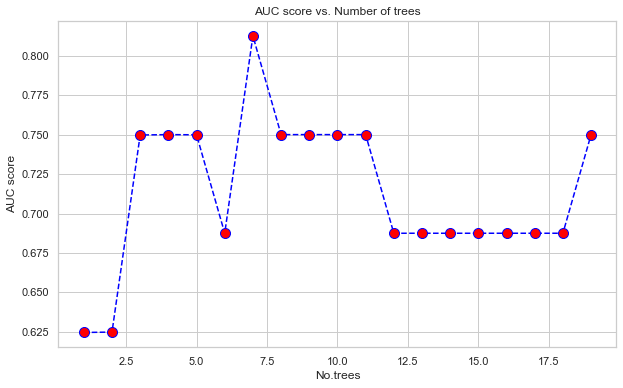

In [236]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('AUC score vs. Number of trees')
plt.xlabel('No.trees')
plt.ylabel('AUC score')
plt.savefig('RF_AUC')

Feature: 0, Score: 0.03519
Feature: 1, Score: 0.12867
Feature: 2, Score: 0.05928
Feature: 3, Score: 0.07403
Feature: 4, Score: 0.00409
Feature: 5, Score: 0.11499
Feature: 6, Score: 0.01067
Feature: 7, Score: 0.01997
Feature: 8, Score: 0.05288
Feature: 9, Score: 0.01007
Feature: 10, Score: 0.01305
Feature: 11, Score: 0.47710


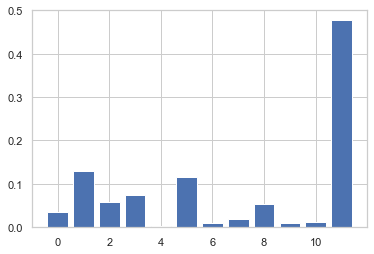

In [258]:
RF_feature = rfc.feature_importances_
for i,v in enumerate(RF_feature):
    print('Feature: %0d, Score: %.5f' %(i,v))
plt.bar([x for x in range(len(RF_feature))], RF_feature)
plt.savefig('importance.png')

In [257]:
pd.DataFrame(rfc.feature_importances_,index=['FG%', 'PPG', 'APG', 'RPG',
       'BLKPG', 'PER', 'TS%', '3PAr', 'FTr', '3P%', '2P%','WinTeam'],columns=['Feature importance'])

,Feature importance
FG%,0.035192
PPG,0.128672
APG,0.059278
RPG,0.074025
BLKPG,0.004090
PER,0.114992
TS%,0.010671
3PAr,0.019973
FTr,0.052881
3P%,0.010071


##### KNN

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, test_size=0.30, random_state=2)

In [191]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

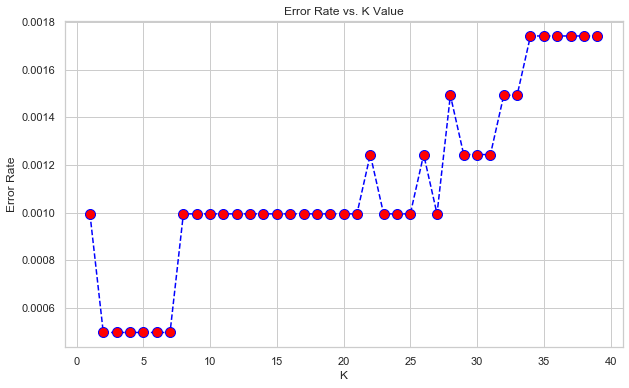

In [198]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig('KNN error rate vs K value')

In [197]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('WITH K=2')
print('\n')
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))
print(roc_auc_score(y_test, knn_pred))

WITH K=2


[[4012    0]
 [   2    6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4020
   macro avg       1.00      0.88      0.93      4020
weighted avg       1.00      1.00      1.00      4020

0.875


##### SVM

In [176]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [204]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(roc_auc_score(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       1.00      0.12      0.22         8

    accuracy                           1.00      4020
   macro avg       1.00      0.56      0.61      4020
weighted avg       1.00      1.00      1.00      4020

[[4012    0]
 [   7    1]]
0.5625


In [208]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.997, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.997, total=   0.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.998, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.997, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.997, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.998, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.997, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.997, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.998, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.997, total=   2.8s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.997, total=   2.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.997, total=   2.2s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.998, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.998, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.998, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.998, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   33.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [209]:
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [210]:
print(classification_report(y_test,grid_predictions))
print(confusion_matrix(y_test,grid_predictions))
print(roc_auc_score(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4012
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4020
   macro avg       1.00      0.88      0.93      4020
weighted avg       1.00      1.00      1.00      4020

[[4012    0]
 [   2    6]]
0.875


## Problem search
Below commands are used only for searching problems and EDA.

##### Focused on position

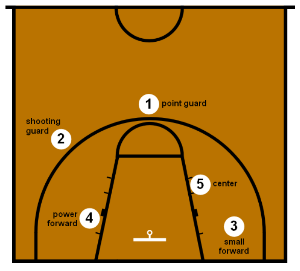

In [18]:
Image.open('positions.png')

> I tried to compare two datasets (player and seasons) with repsect to positions. 'seasons' has more detailed positions listed. 

In [19]:
#Unique values of position
set(player_merge['position'])

{'C', 'C-F', 'F', 'F-C', 'F-G', 'G', 'G-F', nan}

In [44]:
player_merge['position'].value_counts()

G      1321
F      1079
C-F     508
F-G     470
C       432
Name: position, dtype: int64

In [26]:
#Clean up position column 

position_clean = {'F-C':'C-F','G-F':'F-G'}

player_merge['position'] = player_merge['position'].replace(position_clean)
#player_merge['position'] = player_merge['position'].str.split('-',n=1,expand=True)

In [21]:
seasons = seasons.drop(nans(seasons[['Year','Player','Pos']]).index)

NameError: name 'nans' is not defined

In [22]:
#Clean up position column 

position_clean = {'F-C':'C-F','G-F':'F-G','PF-C':'C-PF',
                  'PG-SF':'PG-SF','SF-SG':'SG-SF','PG-SG':'SG-PG','SF-PF':'PF-SF'}

seasons['Pos'] = seasons['Pos'].replace(position_clean)

##### Dealing with missing data

In [108]:
def nans(df):
    return df[df.isnull().any(axis=1)]

In [22]:
player_merge = player_merge.drop([119,201,310,1087])

In [23]:
nans(player_merge)

,Player,height_x,weight_x,born,name,year_start,year_end,position,height_y,weight_y,year_start_d


#The row number 1087 had missing data of position - deleted.

##### Career life
Is career life statistically significantly different per position?

In [24]:
player_merge['career_life'] = player_merge['year_end'] - player_merge['year_start']

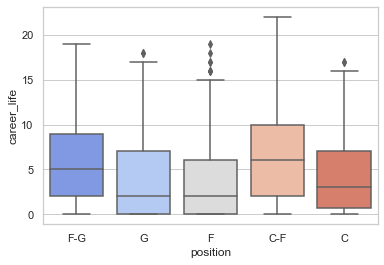

In [27]:
sns.boxplot(x='position',y='career_life',data=player_merge,palette='coolwarm')

FG% (Field goal%: any shot other than a free throw)  
PPG (Points per game)  
RPG (Rebounds per game)  
APG (Average score per game)  
BLKPG (or BPG, Blocks per game)  

In [57]:
MVP

,YEAR,PLAYER,POS,TEAM,FG%,PPG,RPG,APG,BLKPG
0,1987,Magic Johnson,F,Los Angeles Lakers,0.522,23.9,6.3,12.2,0.5
1,1988,Michael Jordan,G,Chicago Bulls,0.535,35.0,5.5,5.9,1.6
2,1989,Magic Johnson,F,Los Angeles Lakers,0.509,22.5,7.9,12.8,0.3
3,1990,Magic Johnson,F,Los Angeles Lakers,0.480,22.3,6.6,11.5,0.4
4,1991,Michael Jordan,G,Chicago Bulls,0.539,31.5,6.0,5.5,1.0
5,1992,Michael Jordan,G,Chicago Bulls,0.519,30.1,6.4,6.1,0.9
6,1993,Charles Barkley,F,Phoenix Suns,0.520,25.6,12.2,5.1,1.0
7,1994,Hakeem Olajuwon,C,Houston Rockets,0.528,27.3,11.9,3.6,3.7
8,1995,David Robinson,C,San Antonio Spurs,0.530,27.6,10.8,2.9,3.2
9,1996,Michael Jordan,G,Chicago Bulls,0.495,30.4,6.6,4.3,0.5


In [37]:
seasons[seasons['Player']=='Giannis Antetokounmpo']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22277,2014.0,Giannis Antetokounmpo,SF,19.0,MIL,77.0,23.0,1897.0,10.8,0.518,...,0.683,78.0,261.0,339.0,150.0,60.0,61.0,122.0,173.0,525.0
22886,2015.0,Giannis Antetokounmpo,SG,20.0,MIL,81.0,71.0,2541.0,14.8,0.552,...,0.741,100.0,442.0,542.0,207.0,73.0,85.0,173.0,254.0,1030.0
23537,2016.0,Giannis Antetokounmpo,PG,21.0,MIL,80.0,79.0,2823.0,18.8,0.566,...,0.724,113.0,499.0,612.0,345.0,94.0,113.0,208.0,258.0,1350.0
24115,2017.0,Giannis Antetokounmpo,SF,22.0,MIL,80.0,80.0,2845.0,26.1,0.599,...,0.770,142.0,558.0,700.0,434.0,131.0,151.0,234.0,246.0,1832.0


In [39]:
player_merge[player_merge['Player']=='Giannis Antetokounmpo']

,Player,height_x,weight_x,born,name,year_start,year_end,position,height_y,weight_y,year_start_d,career_life
3501,Giannis Antetokounmpo,211.0,100.0,1994.0,Giannis Antetokounmpo,2014,2018,F-G,6-11,222.0,90~,4


In [35]:
#Focused on the traditional 5 positions 
seasons = nans(seasons)
seasons['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
PF-C       27
SG-PG      27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

In [55]:
seasons_pos = seasons[(seasons['Pos'] =='PF')|
                      (seasons['Pos'] =='SG')|
                      (seasons['Pos'] =='C')|
                      (seasons['Pos'] =='SF')|
                      (seasons['Pos'] =='PG')]

In [66]:
seasons[seasons['Pos']=='PF']

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,AST,STL,BLK,TOV,PF,PTS,PPG,APG,RPG,BLKPG
17,1950.0,Bob Brannum,PF,24.0,SHE,59.0,NaN,NaN,NaN,0.408,...,205.0,NaN,NaN,NaN,279.0,713.0,12.1,3.5,NaN,NaN
23,1950.0,Walt Budko,PF,24.0,BLB,66.0,NaN,NaN,NaN,0.388,...,146.0,NaN,NaN,NaN,259.0,595.0,9.0,2.2,NaN,NaN
41,1950.0,Jack Coleman,PF,25.0,ROC,68.0,NaN,NaN,NaN,0.412,...,153.0,NaN,NaN,NaN,223.0,590.0,8.7,2.2,NaN,NaN
45,1950.0,Dillard Crocker,PF,25.0,DNN,53.0,NaN,NaN,NaN,0.369,...,85.0,NaN,NaN,NaN,223.0,723.0,13.6,1.6,NaN,NaN
68,1950.0,Joe Fulks*,PF,28.0,PHW,68.0,NaN,NaN,NaN,0.346,...,56.0,NaN,NaN,NaN,240.0,965.0,14.2,0.8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24675,2017.0,Kyle Wiltjer,PF,24.0,HOU,14.0,0.0,44.0,6.7,0.437,...,2.0,3.0,1.0,5.0,4.0,13.0,0.9,0.1,0.7,0.1
24678,2017.0,Christian Wood,PF,21.0,CHO,13.0,0.0,107.0,15.1,0.591,...,2.0,3.0,6.0,7.0,11.0,35.0,2.7,0.2,2.2,0.5
24680,2017.0,Brandan Wright,PF,29.0,MEM,28.0,5.0,447.0,18.5,0.628,...,15.0,11.0,20.0,10.0,42.0,189.0,6.8,0.5,2.8,0.7
24685,2017.0,Thaddeus Young,PF,28.0,IND,74.0,74.0,2237.0,14.9,0.562,...,122.0,114.0,30.0,96.0,135.0,814.0,11.0,1.6,6.1,0.4


In [59]:
sns.set_style('whitegrid')
sns.lmplot('PPG','APG',data=seasons_pos,hue='Pos',palette='coolwarm',size=6,fit_reg=False)

KeyError: "['PPG', 'APG'] not in index"

There seems to be a strong positive correlation between APG and PPG. Yet, as the data points spread wider along with both axis, I am wondering if a plery's position plays a role in these performance. 